# Targeted Investigation into DEGs
Looking closer into DEGs with gene targets/genes of interest

# Phase 1 vs. Phase 1

## 0. load libraries

In [47]:
library(tidyverse) # for dplyr, stringr, ggplot
library(KEGGREST) # for KEGG pathways
library(multcompView) # for stat labels on ggplot

## 1. load CSVs

In [3]:
# get list of files
files <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs',
    pattern = '\\.csv$',
    full.names = TRUE
    )

head(files)

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_b_c.csv"
[2] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_h_b.csv"
[3] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_h_c.csv"
[4] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_h_w.csv"
[5] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_w_b.csv"
[6] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_w_c.csv"

In [4]:
names(files) <- gsub("^DEG_", "", tools::file_path_sans_ext(basename(files)))
deg_list <- lapply(files, read.csv)
names(deg_list)

[1] "b_c" "h_b" "h_c" "h_w" "w_b" "w_c"

## 2. Growth Genes

### FoxO Signaling Pathway
[He et al., 2022](https://www-sciencedirect-com.umasslowell.idm.oclc.org/science/article/pii/S0888754322001586) identified the FoxO signaling pathway as important for differences in growth

Starting by pulling out the [FoxO KEGG entry](https://www.kegg.jp/entry/cvn04068)

In [11]:
# Get pathway entry
pw <- keggGet("cvn04068")[[1]]

# Extract gene vector
genes_raw <- pw$GENE

# output in df
foxO_genes <- data.frame(
  symbol = genes_raw[seq(1, length(genes_raw), 2)],
  kegg_id  = sub(";.*", "", genes_raw[seq(2, length(genes_raw), 2)])
)

dim(foxO_genes) # 86 genes related to this pathway
head(foxO_genes)

[1] 86  2

,symbol,kegg_id
,<chr>,<chr>
1,111099523,[KO:K04721]
2,111099741,[KO:K21771]
3,111100101,[KO:K09408]
4,111100287,[KO:K09408]
5,111101100,[KO:K04526]
6,111101224,[KO:K01084] [EC:3.1.3.9]


In [13]:
# remove leading LOC for KEGG gene symbol (entrez ID)
deg_list <- map(deg_list, ~
  mutate(.x, X = str_remove(X, "^LOC"))
)

# check it worked
head(deg_list$w_c)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,pair,DEG_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,111129171,35.65903,-21.097912,4.0239489,-5.512340,3.540950e-08,4.848484e-05,1.145283e-04,C vs. W,C
2,111121183,21.46042,19.051204,3.0024718,6.484091,8.926857e-11,2.811335e-07,2.871688e-07,C vs. W,W
3,111106303,35.27859,3.334632,1.1826733,4.367891,1.254522e-05,7.597818e-03,8.282522e-03,C vs. W,W
4,111122541,163.56702,1.697285,1.0090617,3.966527,7.292738e-05,2.702002e-02,5.245876e-02,C vs. W,W
5,111130453,100.84269,2.371222,0.6373756,4.612975,3.969454e-06,2.907209e-03,3.973676e-03,C vs. W,W
6,111120021,13.26161,19.175899,3.2217788,6.107117,1.014466e-09,1.996786e-06,5.265913e-06,C vs. W,W


In [15]:
# pull out matching genes, store in df in list
pathway_hits <- lapply(deg_list, function(df) {
  df[df$X %in% foxO_genes, ]
})

pathway_hits

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,pair,DEG_group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,pair,DEG_group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,pair,DEG_group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,pair,DEG_group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,pair,DEG_group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,pair,DEG_group


looks like none of my DEGs are involved in the FoxO signaling pathway

## 3. HSP70
Looking at TPM (transcripts per million), which controls for gene length and sequencing depth. Calculated in [fpkm_and_tpm.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/fpkm_and_tpm.ipynb)

HSP70: [LOC111137579](https://www.ncbi.nlm.nih.gov/gene/?term=LOC111137579)

In [18]:
# read in tpm csv
tpm <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/tpm.csv')
head(tpm)

,Gene_ID,B1_B1_O01,B1_Nu_O03,B1_W5_O50,B2_B5_O51,B2_C4_O40,B2_Nu_O12,B3_B4_O41,B3_C3_O30,B3_C6_O66,⋯,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_Nu_G41,W6_Nu_G45,W6_W3_G36,W6_W4_G48
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111116054,0.1994808,0.07236005,0.60180479,0.8321459,0.83175842,1.00642945,0.0000000,1.0119636,1.34953096,⋯,0.9674306,0.20086721,0.80396624,0.5159785,0.17719976,1.8792749,0.07494578,0.20836377,0.10563877,0.0000000
2,LOC111126949,20.5707747,10.99468203,11.14959211,12.6827500,12.62084760,7.66657261,9.1193740,8.4191708,7.09051954,⋯,10.1954859,17.31996425,16.55783109,9.7639114,8.63069239,9.7732447,8.59307311,8.01202631,6.91776623,13.0038146
3,LOC111110729,0.2729182,0.64658620,0.39881237,0.2241410,0.39512633,0.47601200,0.3243677,0.4240062,0.61632433,⋯,0.3217041,0.63980350,0.51989360,0.5073886,0.47729290,0.4567113,0.37810331,0.51223746,0.57359896,0.8483374
4,LOC111112434,0.1156385,0.05338700,0.02114331,0.0000000,0.01948154,0.01325965,0.1262591,0.1599907,0.06465451,⋯,0.1246260,0.06351393,0.04236883,0.0000000,0.01867677,0.1667997,0.17378349,0.00000000,0.08907421,0.0000000
5,LOC111120752,5.5153240,6.51319151,5.17655738,5.4451072,4.98263618,4.02899542,3.6186961,4.3212267,7.17038033,⋯,5.9274667,5.32225306,6.76113019,4.4066012,3.90582164,6.3201502,7.14884956,4.01664364,5.40337301,6.1528108
6,LOC111128944,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,⋯,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.05975915,0.00000000,0.0000000


In [27]:
hsp70 <- tpm %>%
  filter(Gene_ID == "LOC111137579") %>%
  select(-Gene_ID) %>%      # remove gene column
  t() %>%                   # transpose
  as.data.frame() %>%       # matrix → data.frame
  rownames_to_column("sample") %>%
  rename(TPM = V1) %>%
filter(str_detect(sample, "Nu")) %>% # filter for only phase1 samples 
filter(sample != 'B3_Nu_O24') # remove outlier sample

dim(hsp70)
head(hsp70)

[1] 23  2

,sample,TPM
,<chr>,<dbl>
1,B1_Nu_O03,8.908714
2,B2_Nu_O12,3.649124
3,B4_Nu_O32,7.957262
4,B5_Nu_O36,8.306279
5,B6_Nu_O47,5.370411
6,C1_Nu_W01,16.537661


In [31]:
# add treatment info to df

hsp.df <- hsp70 %>% 
# full treatment
mutate(treatment = case_when(
    str_starts(sample, 'B') ~ 'Both',
    str_starts(sample, 'C') ~ 'Control',
    str_starts(sample, 'H') ~ 'Hypoxic',
    TRUE ~ 'Warm')
       ) %>%
# temp treatment
mutate(temperature = case_when(
    treatment %in% c('Both', 'Warm') ~ 'Warm',
    TRUE ~ 'Ambient')
       ) %>%
# DO treatment
mutate(DO = case_when(
    treatment %in% c('Hypoxic', 'Both') ~ 'Hypoxic',
    TRUE ~ 'Normoxic')
       )

hsp.df

sample,TPM,treatment,temperature,DO
<chr>,<dbl>,<chr>,<chr>,<chr>
B1_Nu_O03,8.908714,Both,Warm,Hypoxic
B2_Nu_O12,3.649124,Both,Warm,Hypoxic
B4_Nu_O32,7.957262,Both,Warm,Hypoxic
B5_Nu_O36,8.306279,Both,Warm,Hypoxic
B6_Nu_O47,5.370411,Both,Warm,Hypoxic
C1_Nu_W01,16.537661,Control,Ambient,Normoxic
C1_Nu_W05,12.100311,Control,Ambient,Normoxic
C2_Nu_W15,7.831029,Control,Ambient,Normoxic
C3_Nu_W21,8.277871,Control,Ambient,Normoxic


In [44]:
# two-way anova
hsp.aov <- aov(TPM ~ temperature * DO, data = hsp.df)
summary(hsp.aov)

               Df Sum Sq Mean Sq F value Pr(>F)  
temperature     1   6.74    6.74   0.945 0.3432  
DO              1  35.78   35.78   5.019 0.0372 *
temperature:DO  1   1.26    1.26   0.177 0.6788  
Residuals      19 135.46    7.13                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [48]:
# tukey post hoc
hsp.tukey <- TukeyHSD(hsp.aov)
hsp.tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = TPM ~ temperature * DO, data = hsp.df)

$temperature
                  diff       lwr      upr     p adj
Warm-Ambient -1.083474 -3.416283 1.249334 0.3432118

$DO
                     diff       lwr      upr     p adj
Normoxic-Hypoxic 2.494392 0.1615835 4.827201 0.0373938

$`temperature:DO`
                                       diff        lwr      upr     p adj
Warm:Hypoxic-Ambient:Hypoxic     -0.7048976 -5.2511673 3.841372 0.9714971
Ambient:Normoxic-Ambient:Hypoxic  2.9470044 -1.3876937 7.281702 0.2564158
Warm:Normoxic-Ambient:Hypoxic     1.3024660 -3.0322320 5.637164 0.8324484
Ambient:Normoxic-Warm:Hypoxic     3.6519020 -0.8943676 8.198172 0.1434925
Warm:Normoxic-Warm:Hypoxic        2.0073636 -2.5389060 6.553633 0.6092326
Warm:Normoxic-Ambient:Normoxic   -1.6445384 -5.9792364 2.690160 0.7131944


TPM for HSP70 is significantly different between normoxic and hypoxic treatments (regardless of temperature), but there is not interaction of temperature and dissolved oxygen

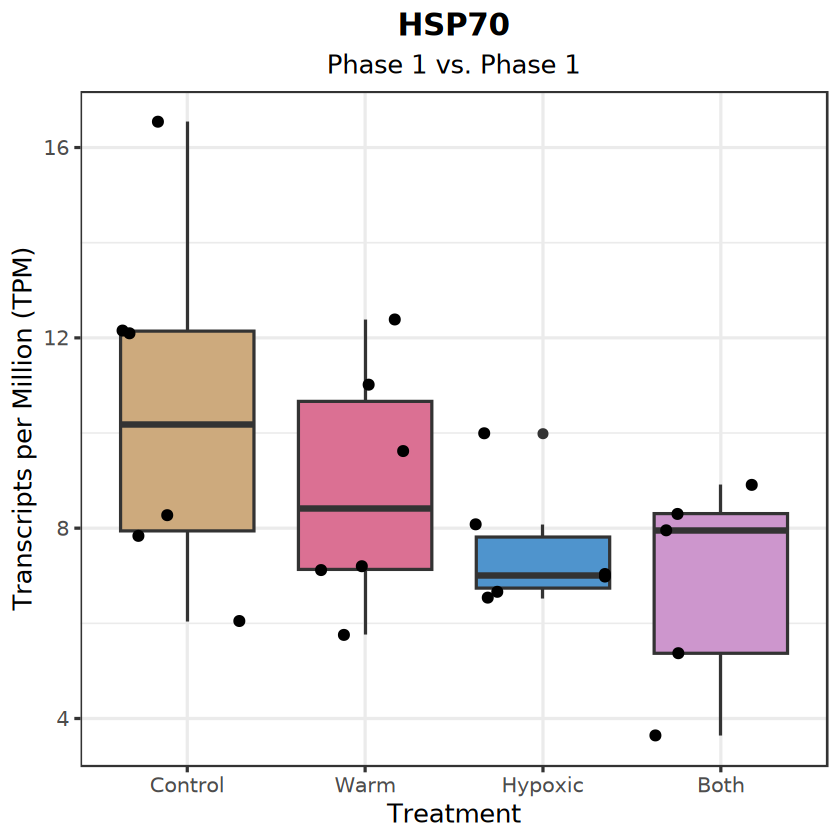

In [61]:
hsp.df$treatment <- factor(hsp.df$treatment, levels = c('Control', 'Warm', 'Hypoxic', 'Both'))

hsp_box <- ggplot(hsp.df, aes(x=treatment, y=TPM, fill = treatment)) +
geom_boxplot() + 
geom_jitter() + 
scale_fill_manual(values = c("Control" = "burlywood3", "Hypoxic" = "steelblue3", "Warm" = "palevioletred", "Both" = "plum3")) + 
theme_bw(base_size = 15) +
labs(title = 'HSP70',
     subtitle = 'Phase 1 vs. Phase 1',
     x = 'Treatment',
     y = 'Transcripts per Million (TPM)') +
theme(legend.position = 'none',
     plot.title = element_text(hjust = 0.5, face = 'bold'),
     plot.subtitle = element_text(hjust = 0.5))

hsp_box

In [62]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/plots/hsp70.tpm_boxplot.pdf', hsp_box)

Saving 6.67 x 6.67 in image
